In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1 Evaluate Paragraph 1 - Catastici

## 1.1 Loading Data

In [3]:
def loading_data(path):
    excel_data = pd.ExcelFile(path)

    # Load evaluation round1 and round2 seperately
    sheet1_data = excel_data.parse('Round_1')
    sheet2_data = excel_data.parse('Round_2')

    return [sheet1_data, sheet2_data]

In [4]:
## Load all evaluation data for P1 - Catatici
# Set path list
ca_fry = 'evaluation_p1p2//CatasticiAccuracy_fry.xlsx'
ca_fzc = 'evaluation_p1p2//CatasticiAccuracy_fzc.xlsx'
cc_fry = 'evaluation_p1p2//CatasticConcise_fry.xlsx'
cc_fzc = 'evaluation_p1p2//CatasticiConcise_fzc.xlsx'

ca_fry = loading_data(ca_fry)
ca_fzc = loading_data(ca_fzc)
cc_fry = loading_data(cc_fry)
cc_fzc = loading_data(cc_fzc)

## 1.2 Inter-Annotation Agreement
- Cohen's Kappa (CK) is a statistical measure that accounts for the agreement between two raters while also considering the possibility of agreement occurring by chance. However, in situations where extreme class imbalance exists (e.g., we assign the same label '1' for all data, which can happen when the results are perfect), Cohen's Kappa becomes unreliable or even misleading.
- In contrast, percentage agreement is a simpler measure of agreement that directly calculates the proportion of matching labels between two raters, without accounting for chance agreement. It is suitable in extreme cases because it does not penalize for class imbalance or extreme label distributions.

- **Percentage Agreement = Number of consistent labels / Total number of labels**


In [5]:
# Set property list for Catastici
property_list = ['Location','Function','Owner Name','Owner title & job','Tenant','Payment']

In [6]:
# Create a df to save and show results
Agree_Cata_Accu = pd.DataFrame(index=['Round1-Accuracy','Round2-Accuracy'],columns=property_list)
Agree_Cata_Conc = pd.DataFrame(index=['Round1-Concise','Round2-Concise'],columns=property_list)

# 1. Round1 - Catastici - Accuracy
for p in property_list:
    annotator1 = ca_fry[0][p]
    annotator2 = ca_fzc[0][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Cata_Accu.loc['Round1-Accuracy',p] = agree

# 1. Round2 - Catastici - Accuracy
for p in property_list:
    annotator1 = ca_fry[1][p]
    annotator2 = ca_fzc[1][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Cata_Accu.loc['Round2-Accuracy',p] = agree

print("Inter-Annotation Agreement on Description Accuracy for Paragraph 1 (Catastici)")
Agree_Cata_Accu

Inter-Annotation Agreement on Description Accuracy for Paragraph 1 (Catastici)


,Location,Function,Owner Name,Owner title & job,Tenant,Payment
Round1-Accuracy,0.95,1.0,0.95,0.9,1.0,0.95
Round2-Accuracy,1.0,1.0,0.95,1.0,1.0,0.95


In [7]:
# 1. Round1 - Catastici - Concise
for p in property_list:
    annotator1 = cc_fry[0][p]
    annotator2 = cc_fzc[0][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Cata_Conc.loc['Round1-Concise',p] = agree

# 1. Round2 - Catastici - Accuracy
for p in property_list:
    annotator1 = cc_fry[1][p]
    annotator2 = cc_fzc[1][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Cata_Conc.loc['Round2-Concise',p] = agree

print("Inter-Annotation Agreement on Description conciseness for Paragraph 1 (Catastici)")
Agree_Cata_Conc

Inter-Annotation Agreement on Description conciseness for Paragraph 1 (Catastici)


,Location,Function,Owner Name,Owner title & job,Tenant,Payment
Round1-Concise,1.0,1.0,1.0,0.9,1.0,0.95
Round2-Concise,1.0,1.0,0.7,1.0,1.0,0.95


## 1.3 Radar Chart
Calculate the average score for each property, and show in Radar chart.

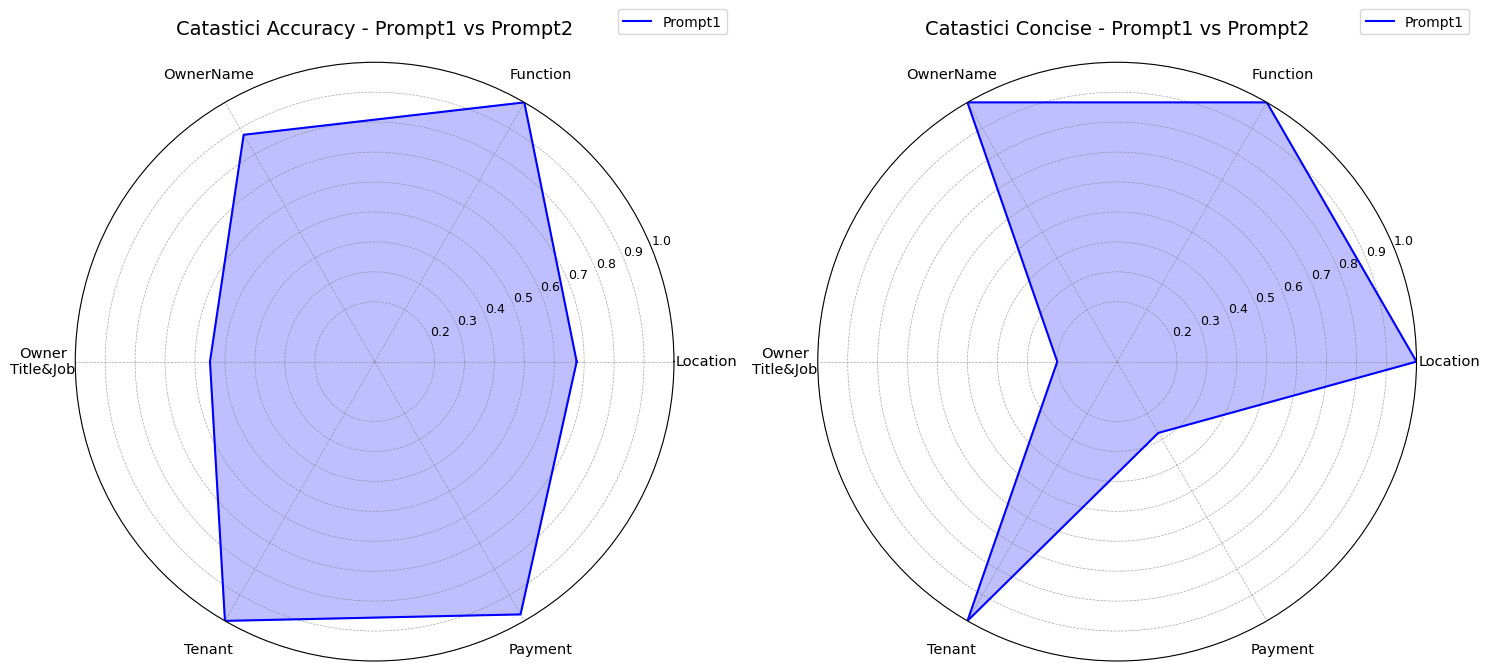

In [10]:
# 1. Catastici Accuracy Round1
CA_r1 = []

for p in property_list:
    score = pd.concat([ca_fry[0][p], ca_fzc[0][p]])
    CA_r1.append(score.mean())

# 3. Catastici Concise Round1
CC_r1 = []

for p in property_list:
    score = pd.concat([cc_fry[0][p], cc_fzc[0][p]])
    CC_r1.append(score.mean())

# Convert data to the format required for radar charts
CA_r1 += CA_r1[:1]
CC_r1 += CC_r1[:1]

angles = np.linspace(0, 2 * np.pi, len(property_list), endpoint=False).tolist()
angles += angles[:1]  # Add the first point to close the radar chart

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw=dict(polar=True))

# Plot the first chart (CA_r1 vs CA_r2)
axs[0].plot(angles, CA_r1, label='Prompt1', color='blue')
axs[0].fill(angles, CA_r1, color='blue', alpha=0.25)
axs[0].set_title('Catastici Accuracy - Prompt1 vs Prompt2', fontsize=14, pad=20)

# Plot the second chart (CC_r1 vs CC_r2)
axs[1].plot(angles, CC_r1, label='Prompt1', color='blue')
axs[1].fill(angles, CC_r1, color='blue', alpha=0.25)
axs[1].set_title('Catastici Concise - Prompt1 vs Prompt2', fontsize=14, pad=20)

# Configure the parameters for each radar chart
new_property_list = ['Location','Function','OwnerName','Owner\nTitle&Job','Tenant','Payment']
for ax in axs:
    ax.set_xticks(angles[:-1])  # Exclude the last repeated point
    ax.set_xticklabels(new_property_list, fontsize=10.5, ha='center', rotation=0)
    ax.tick_params(axis='x', pad=13)
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # specify the y-axis ticks
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=9)  # Set font size for y-axis tick labels
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize gridline styles
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))  # Adjust the legend position based on layout
    # Move the xtick labels further from the radar chart


# Adjust layout and display the radar charts
plt.tight_layout()

# Save the figure with high dpi
plt.savefig('evaluation_p1p2//Catastici_radar_chart_r1.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()


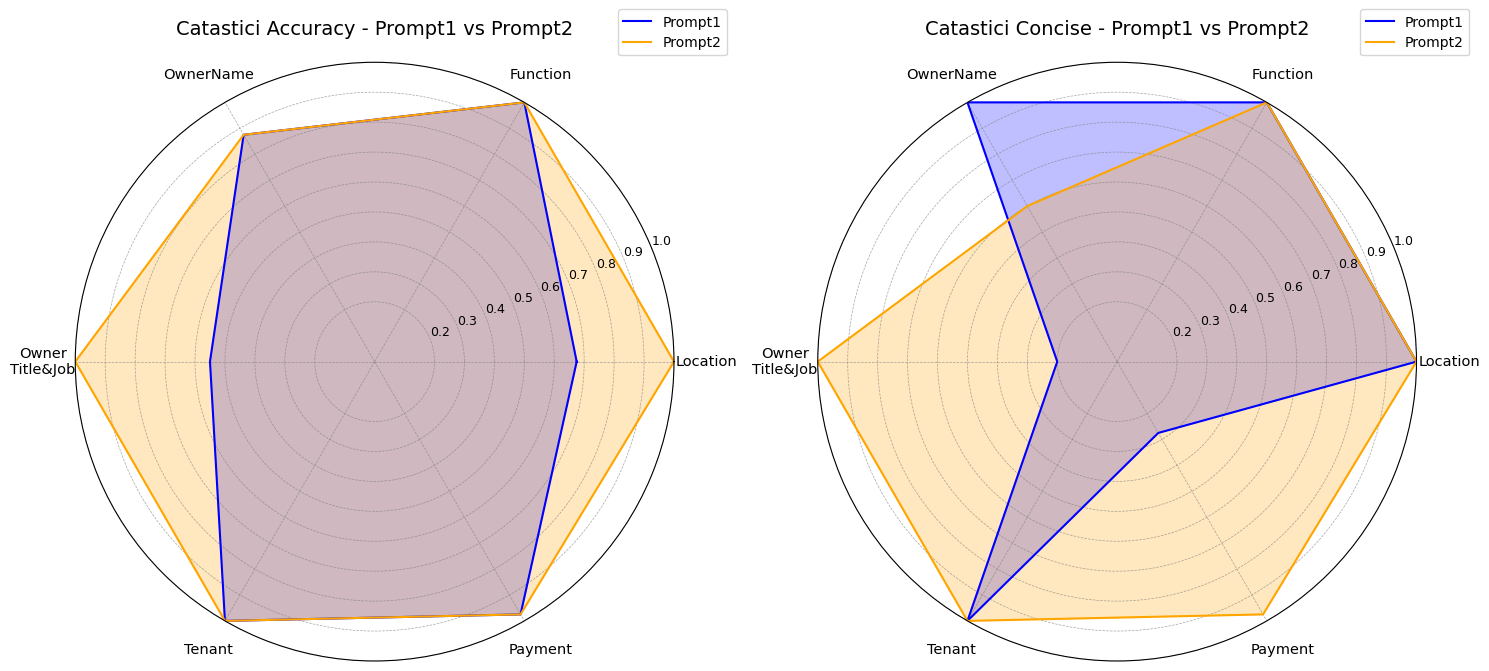

In [11]:
# 1. Catastici Accuracy Round1
CA_r1 = []

for p in property_list:
    score = pd.concat([ca_fry[0][p], ca_fzc[0][p]])
    CA_r1.append(score.mean())

# 2. Catastici Accuracy Round2
CA_r2 = []

for p in property_list:
    score = pd.concat([ca_fry[1][p], ca_fzc[1][p]])
    CA_r2.append(score.mean())

# 3. Catastici Concise Round1
CC_r1 = []

for p in property_list:
    score = pd.concat([cc_fry[0][p], cc_fzc[0][p]])
    CC_r1.append(score.mean())

# 4. Catastici Concise Round2
CC_r2 = []

for p in property_list:
    score = pd.concat([cc_fry[1][p], cc_fzc[1][p]])
    CC_r2.append(score.mean())

# Convert data to the format required for radar charts
CA_r1 += CA_r1[:1]
CA_r2 += CA_r2[:1]
CC_r1 += CC_r1[:1]
CC_r2 += CC_r2[:1]

angles = np.linspace(0, 2 * np.pi, len(property_list), endpoint=False).tolist()
angles += angles[:1]  # Add the first point to close the radar chart

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw=dict(polar=True))

# Plot the first chart (CA_r1 vs CA_r2)
axs[0].plot(angles, CA_r1, label='Prompt1', color='blue')
axs[0].fill(angles, CA_r1, color='blue', alpha=0.25)
axs[0].plot(angles, CA_r2, label='Prompt2', color='orange')
axs[0].fill(angles, CA_r2, color='orange', alpha=0.25)
axs[0].set_title('Catastici Accuracy - Prompt1 vs Prompt2', fontsize=14, pad=20)

# Plot the second chart (CC_r1 vs CC_r2)
axs[1].plot(angles, CC_r1, label='Prompt1', color='blue')
axs[1].fill(angles, CC_r1, color='blue', alpha=0.25)
axs[1].plot(angles, CC_r2, label='Prompt2', color='orange')
axs[1].fill(angles, CC_r2, color='orange', alpha=0.25)
axs[1].set_title('Catastici Concise - Prompt1 vs Prompt2', fontsize=14, pad=20)

# Configure the parameters for each radar chart
new_property_list = ['Location','Function','OwnerName','Owner\nTitle&Job','Tenant','Payment']
for ax in axs:
    ax.set_xticks(angles[:-1])  # Exclude the last repeated point
    ax.set_xticklabels(new_property_list, fontsize=10.5, ha='center', rotation=0)
    ax.tick_params(axis='x', pad=13)
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # specify the y-axis ticks
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=9)  # Set font size for y-axis tick labels
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize gridline styles
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))  # Adjust the legend position based on layout
    # Move the xtick labels further from the radar chart


# Adjust layout and display the radar charts
plt.tight_layout()

# Save the figure with high dpi
plt.savefig('evaluation_p1p2//Catastici_radar_chart_r1r2.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()


In [15]:
Cata_Accu = pd.DataFrame(index=['Round1-Accuracy','Round2-Accuracy'],columns=property_list)
Cata_Accu.iloc[0,:] = CA_r1[:-1]
Cata_Accu.iloc[1,:] = CA_r2[:-1]
Cata_Accu

,Location,Function,Owner Name,Owner title & job,Tenant,Payment
Round1-Accuracy,0.675,1.0,0.875,0.55,1.0,0.975
Round2-Accuracy,1.0,1.0,0.875,1.0,1.0,0.975


In [16]:
Cata_Conc = pd.DataFrame(index=['Round1-Concise','Round2-Concise'],columns=property_list)
Cata_Conc.iloc[0,:] = CC_r1[:-1]
Cata_Conc.iloc[1,:] = CC_r2[:-1]
Cata_Conc

,Location,Function,Owner Name,Owner title & job,Tenant,Payment
Round1-Concise,1.0,1.0,1.0,0.2,1.0,0.275
Round2-Concise,1.0,1.0,0.6,1.0,1.0,0.975


# 2 Evaluate Paragraph 2 - Sommarioni

## 2.1 Loading Data

In [17]:
## Load all evaluation data for P2 - Sommarioni
# Set path list
sa_fry = 'evaluation_p1p2//SommaroniAccuracy_fry.xlsx'
sa_fzc = 'evaluation_p1p2//SommaroniAccuracy_fzc.xlsx'
sc_fry = 'evaluation_p1p2//SommaroniConcise_fry.xlsx'
sc_fzc = 'evaluation_p1p2//SommaroniConcise_fzc.xlsx'

sa_fry = loading_data(sa_fry)
sa_fzc = loading_data(sa_fzc)
sc_fry = loading_data(sc_fry)
sc_fzc = loading_data(sc_fzc)

## 2.2 Inter-Annotation Agreement

In [18]:
# Set property list for Sommarioni
property_list = ['Location','Function','Ownership','Owner family','Other Notes']

In [19]:
# Create a df to save and show results
Agree_Somm_Accu = pd.DataFrame(index=['Round1-Accuracy','Round2-Accuracy'],columns=property_list)
Agree_Somm_Conc = pd.DataFrame(index=['Round1-Concise','Round2-Concise'],columns=property_list)

# 1. Round1 - Sommarioni - Accuracy
for p in property_list:
    annotator1 = sa_fry[0][p]
    annotator2 = sa_fzc[0][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Somm_Accu.loc['Round1-Accuracy',p] = agree

# 1. Round2 - Sommarioni - Accuracy
for p in property_list:
    annotator1 = sa_fry[1][p]
    annotator2 = sa_fzc[1][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Somm_Accu.loc['Round2-Accuracy',p] = agree

print("Inter-Annotation Agreement on Description Accuracy for Paragraph 2 (Sommarioni)")
Agree_Somm_Accu

Inter-Annotation Agreement on Description Accuracy for Paragraph 2 (Sommarioni)


,Location,Function,Ownership,Owner family,Other Notes
Round1-Accuracy,0.9375,0.8125,0.8125,0.9375,0.875
Round2-Accuracy,0.95,1.0,0.85,0.9,0.95


In [20]:
# 1. Round1 - Sommarioni - Concise
for p in property_list:
    annotator1 = sc_fry[0][p]
    annotator2 = sc_fzc[0][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Somm_Conc.loc['Round1-Concise',p] = agree

# 1. Round2 - Sommarioni - Accuracy
for p in property_list:
    annotator1 = sc_fry[1][p]
    annotator2 = sc_fzc[1][p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Somm_Conc.loc['Round2-Concise',p] = agree

print("Inter-Annotation Agreement on Description conciseness for Paragraph 2 (Sommarioni)")
Agree_Somm_Conc

Inter-Annotation Agreement on Description conciseness for Paragraph 2 (Sommarioni)


,Location,Function,Ownership,Owner family,Other Notes
Round1-Concise,0.875,0.9375,0.8125,0.9375,0.875
Round2-Concise,1.0,1.0,1.0,0.95,1.0


## 2.3 Radar Chart
Calculate the average score for each property, and show in Radar chart.

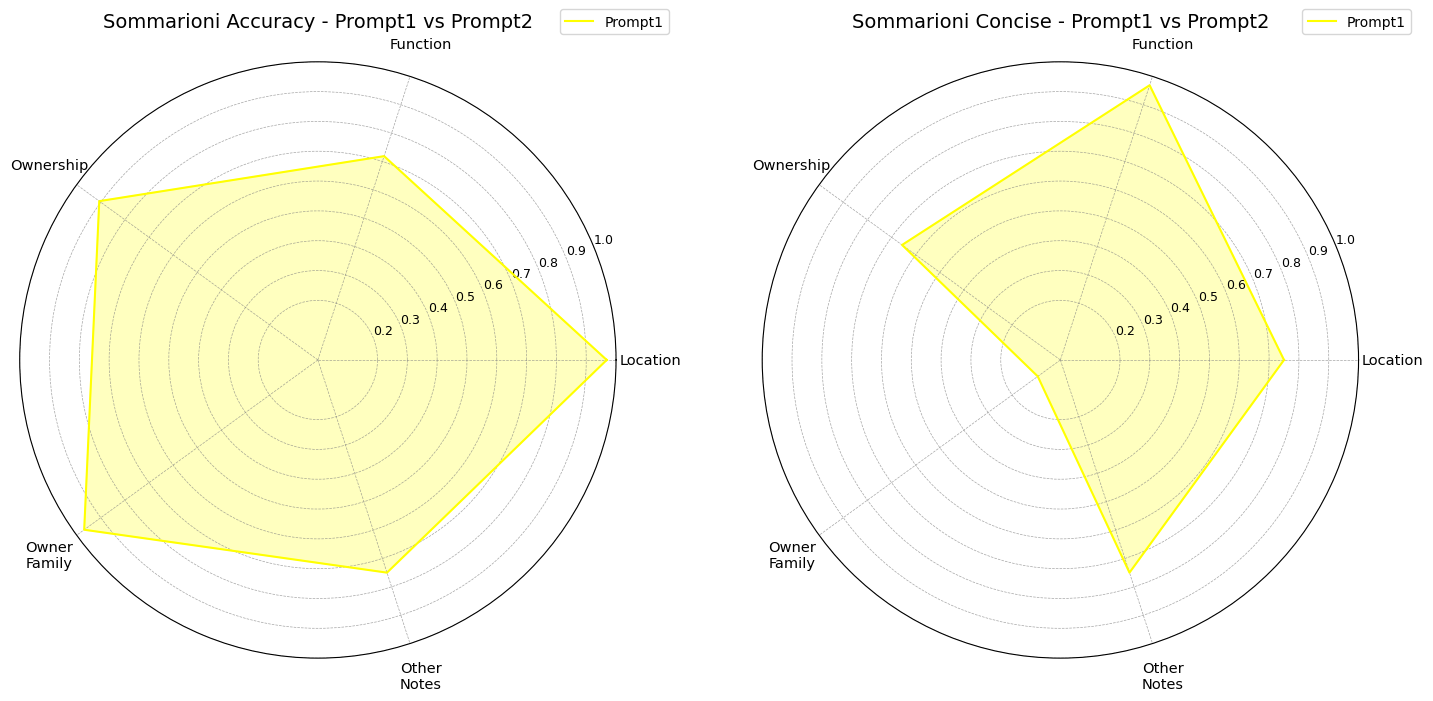

In [21]:
# 1. Sommarioni Accuracy Round1
SA_r1 = []

for p in property_list:
    score = pd.concat([sa_fry[0][p], sa_fzc[0][p]])
    SA_r1.append(score.mean())


# 3. Sommarioni Concise Round1
SC_r1 = []

for p in property_list:
    score = pd.concat([sc_fry[0][p], sc_fzc[0][p]])
    SC_r1.append(score.mean())

# Convert data to the format required for radar charts
SA_r1 += SA_r1[:1]
SC_r1 += SC_r1[:1]

angles = np.linspace(0, 2 * np.pi, len(property_list), endpoint=False).tolist()
angles += angles[:1]  # Add the first point to close the radar chart

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw=dict(polar=True))

# Plot the first chart (CA_r1 vs CA_r2)
axs[0].plot(angles, SA_r1, label='Prompt1', color='yellow')
axs[0].fill(angles, SA_r1, color='yellow', alpha=0.25)
axs[0].set_title('Sommarioni Accuracy - Prompt1 vs Prompt2', fontsize=14, pad=25)

# Plot the second chart (CC_r1 vs CC_r2)
axs[1].plot(angles, SC_r1, label='Prompt1', color='yellow')
axs[1].fill(angles, SC_r1, color='yellow', alpha=0.25)
axs[1].set_title('Sommarioni Concise - Prompt1 vs Prompt2', fontsize=14, pad=25)

# Configure the parameters for each radar chart
new_property_list = ['Location', 'Function', 'Ownership', 'Owner\nFamily', 'Other\nNotes']
for ax in axs:
    ax.set_xticks(angles[:-1])  # Exclude the last repeated point
    ax.set_xticklabels(new_property_list, fontsize=10.5, ha='center', rotation=0)
    ax.tick_params(axis='x', pad=14)
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # specify the y-axis ticks
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=9)  # Set font size for y-axis tick labels
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize gridline styles
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))  # Adjust the legend position based on layout
    # Move the xtick labels further from the radar chart


# Adjust layout and display the radar charts
plt.tight_layout()

# Save the figure with high dpi
plt.savefig('evaluation_p1p2//Sommarioni_radar_chart_r1.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()


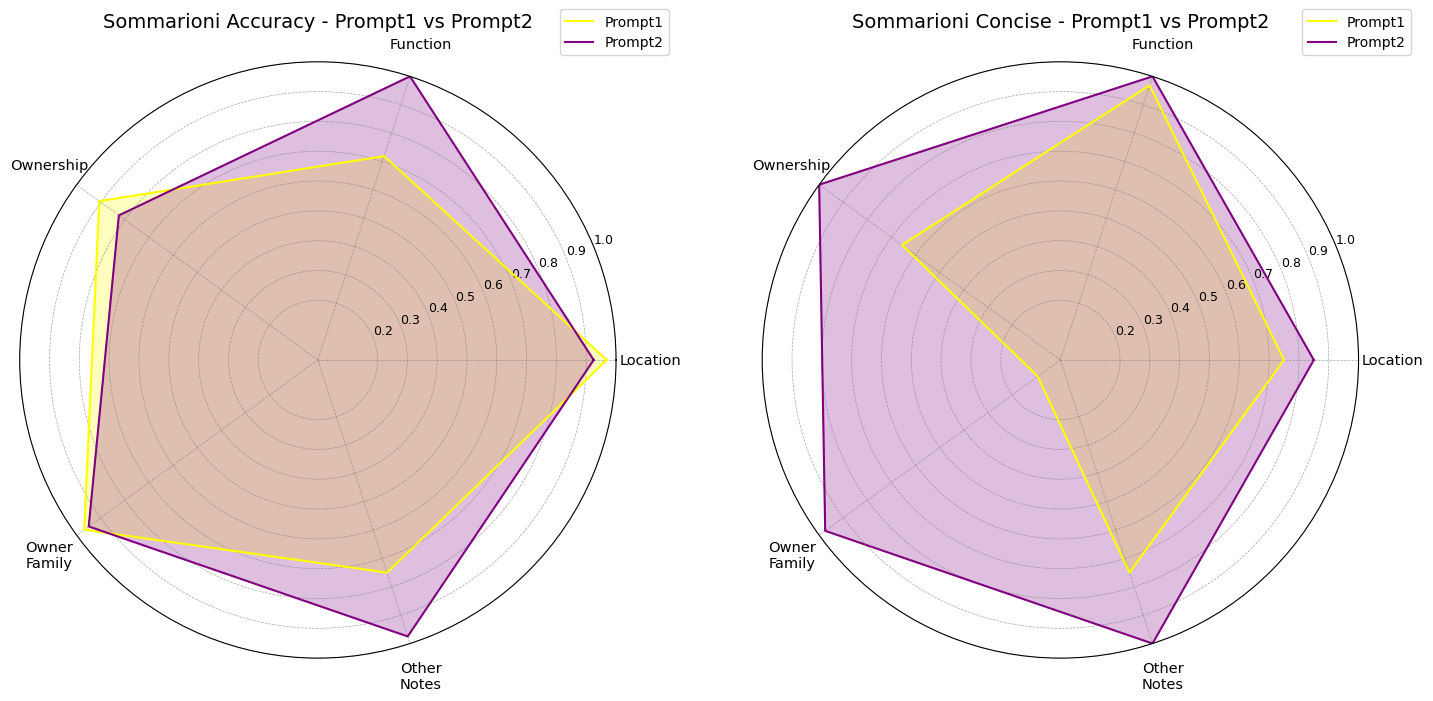

In [22]:
# 1. Sommarioni Accuracy Round1
SA_r1 = []

for p in property_list:
    score = pd.concat([sa_fry[0][p], sa_fzc[0][p]])
    SA_r1.append(score.mean())

# 2. Sommarioni Accuracy Round2
SA_r2 = []

for p in property_list:
    score = pd.concat([sa_fry[1][p], sa_fzc[1][p]])
    SA_r2.append(score.mean())

# 3. Sommarioni Concise Round1
SC_r1 = []

for p in property_list:
    score = pd.concat([sc_fry[0][p], sc_fzc[0][p]])
    SC_r1.append(score.mean())

# 4. Sommarioni Concise Round2
SC_r2 = []

for p in property_list:
    score = pd.concat([sc_fry[1][p], sc_fzc[1][p]])
    SC_r2.append(score.mean())

# Convert data to the format required for radar charts
SA_r1 += SA_r1[:1]
SA_r2 += SA_r2[:1]
SC_r1 += SC_r1[:1]
SC_r2 += SC_r2[:1]

angles = np.linspace(0, 2 * np.pi, len(property_list), endpoint=False).tolist()
angles += angles[:1]  # Add the first point to close the radar chart

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw=dict(polar=True))

# Plot the first chart (CA_r1 vs CA_r2)
axs[0].plot(angles, SA_r1, label='Prompt1', color='yellow')
axs[0].fill(angles, SA_r1, color='yellow', alpha=0.25)
axs[0].plot(angles, SA_r2, label='Prompt2', color='purple')
axs[0].fill(angles, SA_r2, color='purple', alpha=0.25)
axs[0].set_title('Sommarioni Accuracy - Prompt1 vs Prompt2', fontsize=14, pad=25)

# Plot the second chart (CC_r1 vs CC_r2)
axs[1].plot(angles, SC_r1, label='Prompt1', color='yellow')
axs[1].fill(angles, SC_r1, color='yellow', alpha=0.25)
axs[1].plot(angles, SC_r2, label='Prompt2', color='purple')
axs[1].fill(angles, SC_r2, color='purple', alpha=0.25)
axs[1].set_title('Sommarioni Concise - Prompt1 vs Prompt2', fontsize=14, pad=25)

# Configure the parameters for each radar chart
new_property_list = ['Location', 'Function', 'Ownership', 'Owner\nFamily', 'Other\nNotes']
for ax in axs:
    ax.set_xticks(angles[:-1])  # Exclude the last repeated point
    ax.set_xticklabels(new_property_list, fontsize=10.5, ha='center', rotation=0)
    ax.tick_params(axis='x', pad=14)
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # specify the y-axis ticks
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=9)  # Set font size for y-axis tick labels
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize gridline styles
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))  # Adjust the legend position based on layout
    # Move the xtick labels further from the radar chart


# Adjust layout and display the radar charts
plt.tight_layout()

# Save the figure with high dpi
plt.savefig('evaluation_p1p2//Sommarioni_radar_chart_r1r2.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()


In [23]:
Somm_Accu = pd.DataFrame(index=['Round1-Accuracy','Round2-Accuracy'],columns=property_list)
Somm_Accu.iloc[0,:] = SA_r1[:-1]
Somm_Accu.iloc[1,:] = SA_r2[:-1]
Somm_Accu

,Location,Function,Ownership,Owner family,Other Notes
Round1-Accuracy,0.96875,0.71875,0.90625,0.96875,0.75
Round2-Accuracy,0.925,1.0,0.825,0.95,0.975


In [24]:
Somm_Conc = pd.DataFrame(index=['Round1-Concise','Round2-Concise'],columns=property_list)
Somm_Conc.iloc[0,:] = SC_r1[:-1]
Somm_Conc.iloc[1,:] = SC_r2[:-1]
Somm_Conc

,Location,Function,Ownership,Owner family,Other Notes
Round1-Concise,0.75,0.96875,0.65625,0.09375,0.75
Round2-Concise,0.85,1.0,1.0,0.975,1.0


# 3 Evaluate Paragraph Summary

## 3.1 Loading Data

In [25]:
## Load all evaluation data for P2 - Sommarioni
# Set path list
summary_fry = 'evaluation_summary//sample_summary_fry.csv'
summary_fzc = 'evaluation_summary//sample_summary_fzc.csv'

summary_fry = pd.read_csv(summary_fry)
summary_fzc = pd.read_csv(summary_fzc)

## 3.2 Inter-Annotation Agreement

In [26]:
# Create a df to save and show results
property_list = ['ParcelInfo', 'OwnerInfo', 'RentalInfo']
Agree_Summary = pd.DataFrame(index=['Plausibility'],columns=property_list)

# 1. Round1 - Sommarioni - Accuracy
for p in property_list:
    annotator1 = summary_fry[p]
    annotator2 = summary_fzc[p]

    agree = accuracy_score(annotator1, annotator2)
    Agree_Summary.loc['Plausibility',p] = agree

print("Inter-Annotation Agreement on Description Plausibility for Paragraph Summary")
Agree_Summary

Inter-Annotation Agreement on Description Plausibility for Paragraph Summary


,ParcelInfo,OwnerInfo,RentalInfo
Plausibility,0.8125,0.75,0.9375


## 2.3 Radar Chart
Calculate the average score for each property, and show in Radar chart.

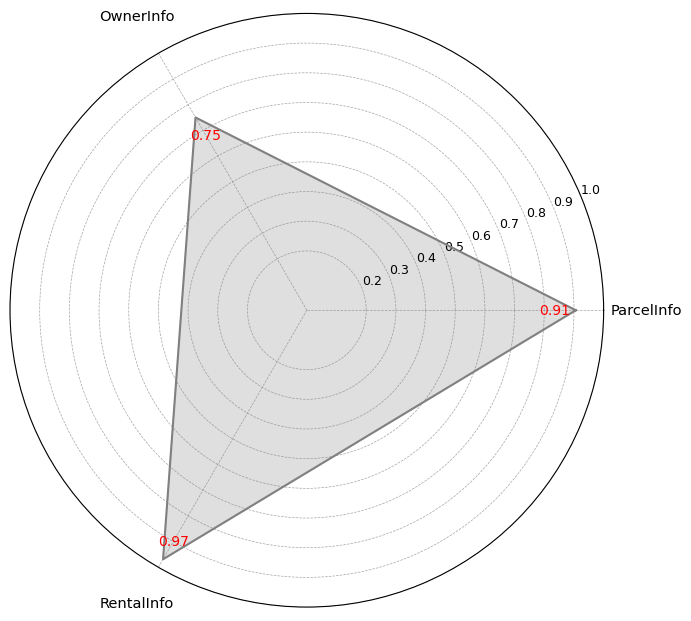

In [27]:
# 1. Sommarioni Accuracy Round1
Summary_r1 = []

for p in property_list:
    score = pd.concat([summary_fry[p], summary_fzc[p]])
    Summary_r1.append(score.mean())

# Convert data to the format required for radar charts
Summary_r1 += Summary_r1[:1]

angles = np.linspace(0, 2 * np.pi, len(property_list), endpoint=False).tolist()
angles += angles[:1]  # Add the first point to close the radar chart

# Create a polar radar chart
plt.figure(figsize=(7, 7))  # Set the figure size
ax = plt.subplot(111, polar=True)  # Single polar subplot

# Plot the radar chart
ax.plot(angles, Summary_r1, color='grey')
ax.fill(angles, Summary_r1, color='grey', alpha=0.25)

# Add data labels to each endpoint
for i, value in enumerate(Summary_r1[:-1]):  # Exclude the last repeated point
    angle_rad = angles[i]
    # Slightly offset the position
    x = angle_rad
    y = value - 0.07  # Move labels further out for better visibility
    ax.text(x, y, f"{value:.2f}", fontsize=10, ha='center', va='center', color='red')  # Change label color to blue


# Configure the radar chart
ax.set_xticks(angles[:-1])  # Exclude the last repeated point
ax.set_xticklabels(property_list, fontsize=10.5, ha='center', rotation=0)
ax.tick_params(axis='x', pad=20)
ax.set_ylim(0, 1)  # Set the y-axis range
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # Specify y-axis ticks
ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=9)  # Y-axis tick labels
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize gridline styles

# Display the radar chart
plt.tight_layout()


# Save the figure with high dpi
plt.savefig('evaluation_summary//Summary_radar_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()
